In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('C:\\Users\\jash\\Desktop\\Ishantgupta\\Algerian_forest_fires_cleaned.csv')

# Display the first few rows of the dataframe
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
df.isnull()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
#checking outliers
# Assuming 'df' is your dataframe
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_outliers)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4  0.4   3.0   
15    16      6  2012           29  89  13   0.7  36.1   1.7   7.6  0.0   2.2   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
218    6      9  2012           34  71  14   6.5  64.5   3.3   9.1  1.0   3.5   
231   19      9  2012           29  41   8   0.1  83.9  24.9  86.0  2.7  28.9   
236   24      9  2012           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   

     FWI      Classes  Regi

c:\users\jash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


In [32]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outliers]
df_cleaned.count()

c:\users\jash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


day            177
month          177
year           177
Temperature    177
RH             177
Ws             177
Rain           177
FFMC           177
DMC            177
DC             177
ISI            177
BUI            177
FWI            177
Classes        177
Region         177
dtype: int64

In [38]:
#checking outliers
# Assuming 'df' is your dataframe
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outliers = df[((df_cleaned < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_outliers)
# Assuming 'outliers' is your boolean mask
if not df_outliers.empty:
    print("Outliers are present.")
else:
    print("No outliers present.")


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []
No outliers present.


c:\users\jash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


In [41]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale
import seaborn as sns
import pickle
%matplotlib inline
X=df_cleaned[['Temperature','RH','Ws']]
# Selecting the dependent variable (y)
y = df_cleaned['FWI']
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

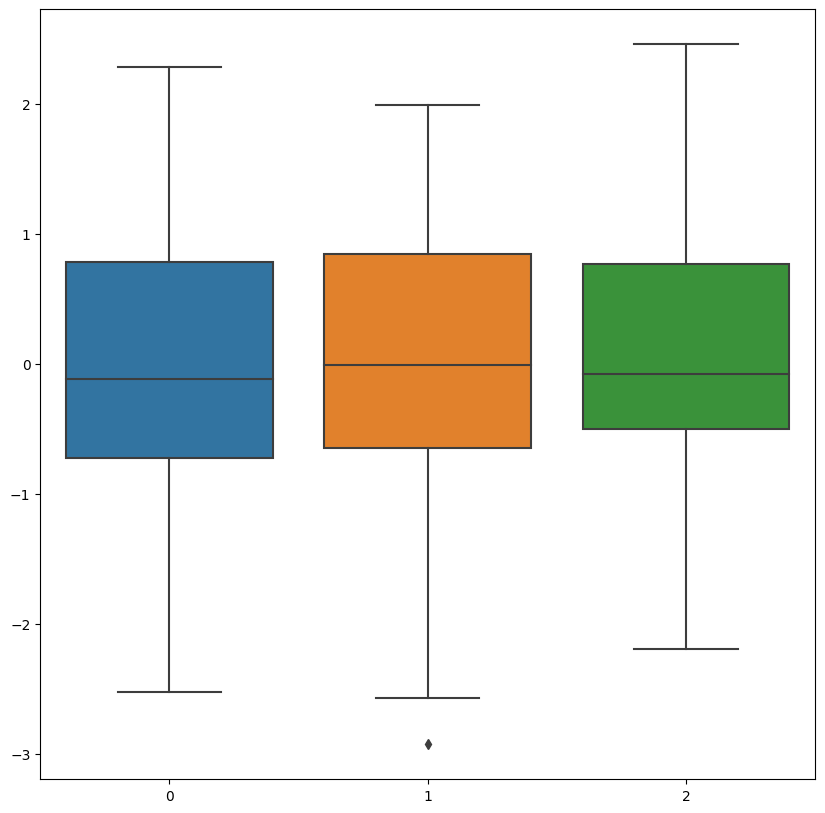

In [42]:
#outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled)
plt.show()


In [43]:
lr_fire=LinearRegression()
lr_fire.fit(X_train_scaled, y_train)

lr_fire.coef_, lr_fire.intercept_

y_pred = lr_fire.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

17.030482292767577 3.5126971785904093 0.49614912394989463


In [44]:

pickle.dump(lr_fire, open('lr_fire.pkl', 'wb'))

pickle.dump(scaler, open('scaler.pkl', 'wb'))